<a href="https://colab.research.google.com/github/blueberrylazjy/pytorch/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits_data = datasets.load_digits()


digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train,  t_test = train_test_split(digit_images, labels)
print(digits_data.target[:15])
print(digits_data.data[1])

x_train = torch.tensor(x_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
t_train = torch.tensor(t_train, dtype = torch.int64)
t_test = torch.tensor(t_test, dtype = torch.int64)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]


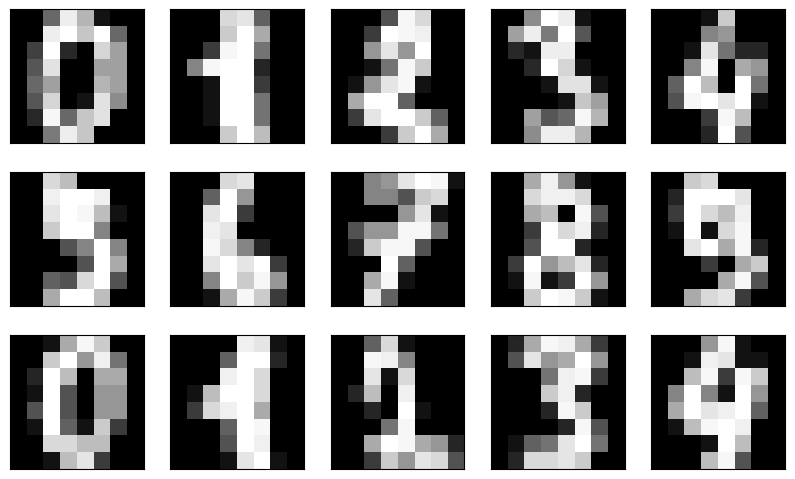

データ形状: (1797, 64)
ラベル: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


In [39]:
import matplotlib.pyplot as plt
from sklearn import datasets

n_img = 15
plt.figure(figsize=(10,6))

for i in range(n_img):
  ax = plt.subplot(3,5,i+1)
  label = digits_data.target
  print(label)
  ax.imshow(digit_images[i].reshape(8,8),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print("データ形状:", digits_data.data.shape)
print("ラベル:", digits_data.target[:n_img])


In [40]:
from torch import nn
net = nn.Sequential(
    nn.Linear(64,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [46]:
from torch import optim

loss_fnc = nn.CrossEntropyLoss()

params = net.parameters()
optimizer = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)


record_loss_train=[]
record_loss_test=[]

for i in range(1001):
  
  optimizer.zero_grad()

  y_train = net(x_train)
  y_test = net(x_test)

  loss_train = loss_fnc(y_train, t_train)
  loss_test = loss_fnc(y_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  loss_train.backward()

  optimizer.step()

  if i%100 == 0:
    print("Epoch:",i,"Loss_Train:", loss_train.item(), "Lost_test:", loss_test.item())


Epoch: 0 Loss_Train: 2.756379581114743e-05 Lost_test: 0.10721608996391296
Epoch: 100 Loss_Train: 0.00013732790830545127 Lost_test: 0.207186758518219
Epoch: 200 Loss_Train: 7.75357912061736e-05 Lost_test: 0.1966424584388733
Epoch: 300 Loss_Train: 5.5953754781512544e-05 Lost_test: 0.19059567153453827
Epoch: 400 Loss_Train: 4.454105146578513e-05 Lost_test: 0.18637655675411224
Epoch: 500 Loss_Train: 3.74563351215329e-05 Lost_test: 0.18315590918064117
Epoch: 600 Loss_Train: 3.2576816010987386e-05 Lost_test: 0.1805509775876999
Epoch: 700 Loss_Train: 2.897531885537319e-05 Lost_test: 0.17837655544281006
Epoch: 800 Loss_Train: 2.619896076794248e-05 Lost_test: 0.17652034759521484
Epoch: 900 Loss_Train: 2.3999014956643805e-05 Lost_test: 0.1749018132686615
Epoch: 1000 Loss_Train: 2.2198359147296287e-05 Lost_test: 0.1734696477651596


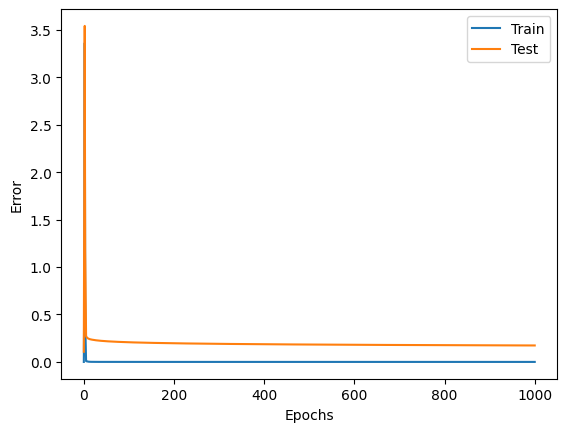

In [47]:
plt.plot(range(len(record_loss_train)),record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()